In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.shape

(768, 9)

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [7]:
x=df.drop("Outcome",axis=1)
y=df["Outcome"]


In [8]:
x=scale(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [9]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [10]:
cm=metrics.confusion_matrix(y_test,y_pred)
acc=metrics.accuracy_score(y_test,y_pred)
ps=metrics.precision_score(y_test,y_pred)
rs=metrics.recall_score(y_test,y_pred)

In [11]:
cs=metrics.classification_report(y_test,y_pred)

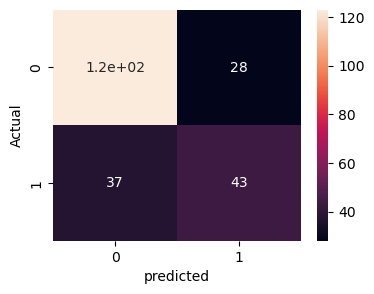

In [13]:
plt.figure(figsize=(4,3))
sns.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.show()